<a href="https://colab.research.google.com/github/ZulfaliaPutri/WeCanNoHate/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
from google.colab import drive
import os
import pandas as pd

import re
import string
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Data Loading

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.listdir('/content/gdrive/My Drive/Capstone/dataset')

['stopwordbahasa.csv',
 'citation.bib',
 'README.md',
 'data.csv',
 'abusive.csv',
 'new_kamusalay.csv',
 'data_clean.csv']

In [ ]:
import chardet
file = '/content/gdrive/My Drive/Capstone/dataset/data.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.7290065581419461, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:
df = pd.read_csv(file,encoding='ISO-8859-1')
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
replace_dict = pd.read_csv("/content/gdrive/My Drive/Capstone/dataset/new_kamusalay.csv", encoding = 'latin-1', header=None)
replace_dict = replace_dict.rename(columns=  {0: 'original', 1: 'replacement'})
replace_dict

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [ ]:
stopwords = pd.read_csv("/content/gdrive/My Drive/Capstone/dataset/stopwordbahasa.csv", header=None)
stopwords = stopwords.rename(columns={0: 'stopword'})
stopwords

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak
...,...
753,wong
754,yaitu
755,yakin
756,yakni


In [ ]:
# Replacement dictionary baru
replace_dict_new = {
 'xb2nya':'nya','x99juj':'juj','x9cmonyet':'monyet','x9ctidak':'tidak','x9ckalau':'kalau','x9cmaju':'maju','x9cada':'ada','x9clagi':'lagi','x9canti':'anti',
 'x9cyang':'yang','x9cdeep':'deep','x9ckami':'kami','x9cbom':'bom','x9cluka':'luka','x9ccacat':'cacat','x9cbossku':'bossku','x8dmenyokong':'menyokong',
 'x94terang':'terang','nkl':'kalau','nhn':'nahan','x98maju':'maju','x9doh':'oh','x9dpara':'para','x9ctiap':'tiap','x80udah':'udah','x8fbukan':'bukan',
 'x9cpemainnya':'pemainnya','x9cbelum':'belum','x98naik':'naik','x9ckamu':'kamu','x9cbapak':'bapak','x97preloved':'preloved','x9cya':'ya','x9cheh':'heh',
 'xa0polisi':'polisi','2009dan':'2009 dan','x9cfree':'free','x99uzubillahi':'nauzubillah','x89memberikan':'memberikan','x98ashpun':'pun','kehed':'sialan',
 'xa0shallallahu':'shallallahu','x98alaihi':'alaihi','xa0membeli':'membeli','xa4matanya':'matanya','x9cdaripada':'daripada','x9cmari':'mari','x9cgue':'gue',
 'x8fsorry':'sorry','x9cshalat':'sholat','x8dyg':'yang','x9cmeeting':'meeting','x9coh':'oh','x9casu':'asu','x9ckntl':'kontol','x9cbgst':'bangsat',
 'x9celok':'elok','x9crumpon':'rumpun','x9ddan':'dan','xa5ada':'ada','x9cseperti':'seperti','xb2lah':'lah','x92congor':'congor','x9ckakap':'kakap',
 'x9ctdk':'tidak','x9cbaiklah':'baiklah','x9chamil':'hamil','xa4bagian':'bagian','x80sebuah':'sebuah','x9ckepada':'kepada','x9cdipengaruhi':'dipengaruhi',
 'militeran':'militer','dicrotin':'crot','bebencongan':'bencong','mengeyel':'ngeyel','kampreter':'kampret','congoran':'bibir','dendaman':'dendam',
 'udeeeh':'udah','goblokan':'goblok','cadaran':'cadar','takaburnya':'takabur','nbut':'tapi','nusantarakan':'nusantara','dinusantarakan':'nusantara',
 'begoin':'bodoh','menyolot':'nyolot','cebonger':'cebong','memuter':'putar','mengonter':'konter','mengeprek':'geprek','didungukan':'dungu','congornya':'congor',
 'asuuuu':'asu','jujungannya':'junjungan','hauz':'haus','crottttt':'crot','hucu':'konghucu','gantle':'jentelmen','mencemplung':'nyemplung','meleteh':'sombong',
 'chaaaaarrrmmmm':'charm','anjirittt':'anjrit','siaaaaallllllll':'sial','benciiiiiiiiiiiiiiiiiiiii':'benci','jahaaaaaaaaaaatttttttt':'jahat','goblokkkk':'goblok',
 'gobloooooooo':'goblok','maksudnyaaa':'maksudnya','gubernurku':'gubernur ku','sukanyaaaa':'sukanya','mampuuuusssssss':'mampus','taekkk':'tai','ribuuut':'ribut',
 'taiiiii':'tai','bangsaaaaaaaatttt':'bangsat','habiisssss':'habis','cangkemmu':'mulut kamu','ngebacotnya':'bacot','berjemaahnya':'jamaah','kalyaaann':'kalian',
 'ngakakkk':'ngakak','laaaahhhhh':'lah','sialll':'sial','tekannnn':'tekan','mikiiiir':'mikir','kerad':'keras','bangsaaat':'bangsat','cihhh':'cih',
 'anjinggg':'anjing','anjingkan':'anjing','anjiiirr':'anjing','anjeeeeng':'anjing','jorokkan':'jorok','nmantapkan':'mantap','stresssssss':'stres',
 'mursidah':'murah','tertilap':'tilap','memebrantas':'memberantas','kepick':'ke ambil','kemako':'ke mako','raupkan':'raup','woooooii':'woi','gabutnya':'gabut',
 'sesembak':'mbak','ngacooo':'kacau','dibacoti':'bacot','tulalittttt':'tulalit','anjr':'anjing','dipemeriksaan':'periksa','mengkampretkan':'kampret',
 'mencebongkan':'cebong','nabuuunggg':'nabung','charutin':'carutin','mengibulnya':'bohong','anjingggg':'anjing','baliiik':'balik','aplikasinyya':'aplikasi',
 'congean':'congek','kaaaaau':'kau','bercandai':'bercanda','debarmu':'debar kamu','kontolan':'kontol','tololisme':'tolol','ngedunguin':'dungu','plokis':'polisi',
 'ohannya':'kebodohannya','sajahhhhh':'saja','diketapang':'ketapang','ilahmu':'tuhan kamu','moderatuser':'moderat','kencingpun':'kencing','dibundari':'bundar',
 'baperki':'baper','berengseknya':'berengsek','bangkrutkan':'bangkrut','syukaaa':'suka','cocotmu':'mulut kamu','mengodei':'kode','rebuplika':'republik',
 'buteknya':'butek','sesigap':'sigap','sajauser':'saja','lewatuser':'lewat','puret':'mengecil','siuser':'si','naikpun':'naik pun','botaki':'botak',
 'nyimengnya':'nyimeng','temenannn':'teman','omongmu':'omongan kamu','kristenpun':'kristen','nyelew':'nyeleneh','kuntinya':'kuntilanak','dimampuskan':'mampus',
 'gilasih':'gila','bikinian':'bikini','kencrot':'kerdus','kabuuurr':'kabur','gmnin':'gimana','bangsulll':'bangsat','anjirrrrr':'anjing','dungukan':'dungu',
 'biadabkan':'biadab','mejelekkan':'jelek','taekkkkkk':'tai','kamfrettt':'kampret','congormu':'mulut kamu','nbenciiiiiiiii':'benci','dibercandai':'bercanda',
 'akurrr':'akur','cobaaak':'coba','luuuu':'kamu','mengaartikan':'mengartikan','asuuuuu':'asu','kintil':'kontol','mulussss':'mulus','sekotornya':'kotor',
 'laperrrr':'lapar','dicalonpresidenkan':'calon presiden','junjugannya':'junjungan','dilapakmu':'lapak','tololin':'tolol','bencoooooooonnnnnnggggg':'bencong',
 'menusantarakan':'nusantara','jahanammmmm':'jahanam','warrrbisah':'luar biasa','sialaaan':'sialan','ngatainnya':'mengejek','perempuannn':'perempuan', 
 'belaganya':'belagu','mantaaapppp':'mantap','mantappppppppp':'mantap','cacinglah':'cacing','kadarmu':'kadar kamu','shopeenya':'shopee','ngantukkk':'ngantuk',
 'ekononmi':'ekonomi','kenapaaaa':'kenapa','nkarenaaaaaaa':'karena','beloonnya':'bodoh','xb3lah':'sebelah','basiiii':'basi','penyengsara':'sengsara',
 'sotooooy':'sok tau','brngsekkkk':'berengsek','cemeeh':'cemooh','dingajikan':'ngaji','nalarpun':'nalar pun','edannnn':'edan','seperintah':'perintah',
 'dasaaaar':'dasar','makamya':'makanya','sadizzz':'sadis','siyaaaaap':'siap','hasutanmu':'hasutan kamu','asekkk':'asik','dijeritkan':'jerit','ngelonte':'lonte',
 'memfiktifkan':'fiktif','awaasss':'awas','yyynng':'yang','dustakaaan':'dusta','lagiiiiiiii':'lagi','finallyyyy':'akhirnya','melipiirrrr':'melipir',
 'kseeeel':'kesal','bayiiiik':'bayi','mengomongnya':'ngomong','mendungukan':'dungu','membiadabkan':'biadab'
}

In [ ]:
#Dihapus
stopwords_new = ['xf0','x9f','xe2','xa6','xa4','x91','xad','x9d','xa3','x85','xc2','x8f','x8d','xe3','x8c','xb2','x9c','x8e','x8a','md3','x83','xa1','xb8',
 'x90','xaa','xa0dll','27juni','31902573','31902583','0510541000096745','05058020145124','x99raf','x8fpsk','nkk','n88','n89','n28','n99','sb2018','rp5',
 'xa2','xef','xa9','xac','x9a','xa5','xba','xb6','xa7','x97','x95','xab','x8b','xb4','xbb','xc3','xaf','xb7','xcd','xbd','xb0','xae','xd9','xb5','xa0',
 'xa8','xe0','x9e','xce','xbe','xd8','x87','xb1','xb9','xe5','xbf','md2','xca','xcc','xb3','md1','n4d','xe1','x9b','jkfc23456789','xe8','n2d','n21','n36',
 'xa8e','70r','x82g','x9clu','xa8rene','nuser','nurl','05a','rp70','4000t','n2d86','n3d965','ncm31','nbbfs7','xxxd','99woojinn','x94gi','x9caza','x9cngh',
 'xadcy','x99ol','288c','108th2017','bxb','b1rhevkrxl','rm421','dxidq4zqhv','rtuser','56969066','n2019','x89user','6281294490616','xa4arra','x82rt',
 'xb9tomohon','x9choi','rp30rb','xb2i','rp75','rp2','n2011','ud83d','adem86','98heru','msnakdnskdnskdndjfn',
  #Nama orang atau barang gedung
 'saracen','gerung','aher','pranowo','tju','moeldoko','sylvi','meikarta','yoyakarta','dardak','kivlan','majdi','hyunjin','kholilurrahman','lilur','mardani',
 'soesatyo','rakercabsu','csis','soemitro','rawita','newmont','ijeck','jokower','tayib','zinnirah','taeyong','milea','ekajati','jamiat', 'arseto','lovren',
 'lucinta','staquf','fauziyah','layanto','mixagrip','himmler','tugimin','v2grcuesti','deact','chirpified','ngabalin','x98',
  #Hapus
 'sungjin','dowoon','iori','nkr','mbappe','tsamara','charliyan','suparji','janab','useruser','auti','muzadi','rpgpedia','subki','bughury','rohidin','mersyah',
 'cholil','woozi','edvina','kahiyang','noureddine','boutayeb','milangasri','tahija','syaithanir','rajimi','nurliyana','aliano','youngji','rlt','blayer',
 'widiana','nomleni','11april','liedabin','lobusiregar','helman','hotman','seungmin','hsca','maktum','damenra','hutanagodang','kiun','eloah','mawati',
 'titot','iq200','unhi','tanos','danilla','yixing','makhmud','saggaf','trimedya','widjanarko','wagirin','balongtani','hadisurya','panekan','panggreh','lhi',
 '082316861194','d2907677','parawansa','kalabong','takiyuddin','choong','ngooaaahahaaa','wusssstt','muliati','lindra','barom','glusar','setambak','haiz',
  #Hapus
 'coel','aaaaaaaaa','paramabudaya','sisternet','xon','kajox','9y4hiwhjp2','xinwen','sinamata','demina','ajsjsjsjaja','katotoloyo','wkwkwkwkkkk','markli',
 'vqh0tnxarz','pnegdjmpch','tats','nzzzeeezzzzsssttt','nse','nurmantyo','masonluk','junev','jendeuk','jungyeon','laeli','yamaken','jucan','mukshin','neeekkk',
 'armidya','afifih','eeeeeeee','wiwo','yosy','anises','hishammuddin','kassim','yeeeuh','hadoiii','sobsssss','kefar','adumim','kedurus','nojo','dgk',
 '100subcribe','talal','xbbparpol','bazl','majhud','askmf','nwedeeeh','jipepet','caileh','ohooo','nhtt','busquets','periodontik','barzan','apollinaris','gmezpoylsy',
 'uuunncchh','gunggg','hongdae','gidle','sopoi','jiaaahh','mijoo','ggggg','josssssssslah','oojinprk','nparjin','delulu','ipro','cuihhhh','lollll','kylaaaaaaya',
 'robbihimul','jddnjdjdej','adrp','ruzhanul','goeun','hikdun','soemantri','woooui',
  #Hapus
 'glusur','bigflo','inshaaallah','sugik','iyuuuh','yanyk','huuuft','frido','prawinegara','ftse','selusup','jaemin','adhkslapwje','hpup','widang','canolly',
 '180973692324','zumiiiii','pbg','bfjgfdg','woyyyy','cukkkkk','nrj','nixon','ltte','memal','apakkk','momoland','hakuri','goblen','wuornos','dandhy','renjun',
 'hoooy','jaehyun','menggusel','sorbejeh','oratornnya','mbikoz','millport','rochadi','ledig','keboguyang','khaththath','sofiya','berambu','ngoaaahahaaaaa',
 'ngejb','kajakkk','dharmawijaya','mantramengisi','lynde','mbue','jeyepe','sudarto','fuyyyyyoooo','mindfuck','karakai','jozu','takagi','nardhi','asyahaab',
 'undeeestimate','mangkrakan','oiyaaa','ppbm','kantoikan','aaaamiiiiiiinnnn','hoook','ekgy','jinkiw','jandro','erudite','getunan','pledis','owaisi','jungwoo',
 'duuhhhh','gustiiiiiiiiiiiiiiii','failosof','mollien','rewatching','noragami','umnobn','driyono','husler','simpurusiang','ngupiii','ngardus','xari',
 'ngeooaahahahaaaaa','junros','barzagli','cisol','jauser','temer','diberangusss','kafin','ngerojok','aiptu','hanat','nhoalaaah','adohhh','ahoknya','thorig',
  #Hapus
 'nogt','netz','mifthakul','iqna','parisudha','hartarto','adiwastra','memframing','cebi','vavang','bwsdn','sosrokartono','pelemkerep','hyura','sudono','sioe',
 'semprulllll','humanit','pck','paingan','kocu','jelus','somatologi','belekok','maranata','adid','medcom','disinisi','chulan','menelponi','tuth','caenliana',
 'albayrak','wiranti','andinia','sempro','boneknya','manggutkan','baghawi','goblinnya','diframing','divya','rusdiana','handmaiden','greenteaaaaa','nsssst',
 'bainanal','edna','stakn','jief','ongseng','kuyaaaaaaaaaaaaa','inkonsistennya','allahummaghfirli','zanbi','ajirni','ckarisha','kaisoo','hunhan','fnxqi',
 'petar','hearthstone','kintin','yoksi','tofa','bediuzzaman','mengoroknya','beroikumene','serusuh','eeyewwww','kacaoooooo','apakabsss','gogobli','laotze',
 'junj','tagonis','sarumpaet','hanzola','hmmmmz','amblek','wiwerda','raphael','maitimo','diniaga','jaewon','raesung','elistianto','soeharsono','sebianto',
 'huewwwww','muanas','lopa','mensiv','uhuwww','gubya','mwaaaa','nmmm','kotbur','inkonsistensimu','suliddddd','kyulkyung','mignolet','mandangkan','fussilat',
 'kingka','zefanya','parmusi','artidjo','kth','jjk','mqm','rehnuma','shehzad','douran','arze','mubtila','slewah','ciletuh','ngesaltyin','kamori','gorbachev',
 'menyetreaming','kurayyim','nazmi','nyeee','dibarus','tebellah','jatey','ayashiya','gharq','sirf','nafrat','intizhar','neopki','hetifah','alquranku',
 'mencamil','munaspil','jisun','cecyl','junhui','jihun','kaab','akimichi','maungdaw','juwaini','ngeeooahahahaaaaaaa','ngileeee','hasselhoff',
 'kaaaaaa','patrialis','lilyana','niklan','stalked','diginesia','puspayoga','tangklukan','segeulgie','dikeci','ompuan','sikpande','asalll','hardiana','kazhar',
 'owwwwh','mansoura','jotef','jogernya','dongokkan','puteeeh','oped','jalema','ngej','cenong','isb','mempannya','auzubillah','jafarudin','attaka','c1a',
 'makase','palti','ardhog','bersudi','lekno','katamsi','tienteuus','ikko','oyes','cuteness','kedungcangkring','pigai','levai',
 'miiinn','soedurisme','tlembuk','dulatips','slutsharming','iparan','exsisting','hazrumy','perrault','kobayakawa','mathilda','mowaa','mubalignya','shaloom',
 'maftukhin','jebi','rruarrr','okn','dunga','kapuji','majdub','draxe','jci','qardhawi','kuduuu','pasrahhh','cpd','puhliiiis','newsidn',
 'koloe','yasuko','akom','ettt','ipey','bodyshaming','denkuzul','oum','dihhh','eaakkk','ellooo','setarbak','qadiani','lebuk','butah','utututut',
 'deutchbank','soign','wooseok','handrini','suprana','devor','mingmukedaisi','vamsam','arturia','shooky','marwanto','junhoe','assalamualaykum','waaaaaw',
 'sophiaan','efilnikcufecin','nwahhh','zedong','shaoqi','taipannya','sampaoli','shummun','ngehype','armeries','pelosika','chenle','hifzil']

In [ ]:
stopwords_new = pd.DataFrame(stopwords_new)
stopwords_new = stopwords_new.rename(columns={0: 'stopword'})
stopwords_new.head()

,stopword
0,xf0
1,x9f
2,xe2
3,xa6
4,xa4


In [ ]:
df.drop(df.iloc[:, 3:12], inplace = True, axis = 1)
df.head()

,Tweet,HS,Abusive,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0


In [ ]:
df['length'] = df['Tweet'].apply(len)
df.head()

,Tweet,HS,Abusive,HS_Strong,length
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,89


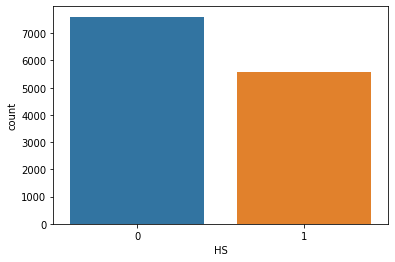

In [ ]:
import seaborn as sns
sns.countplot(x='HS', data=df)

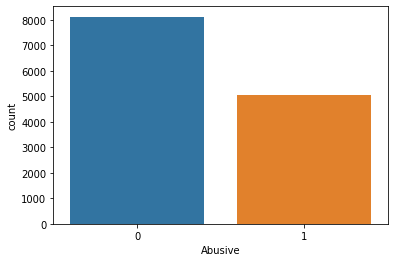

In [ ]:
sns.countplot(x='Abusive', data=df)

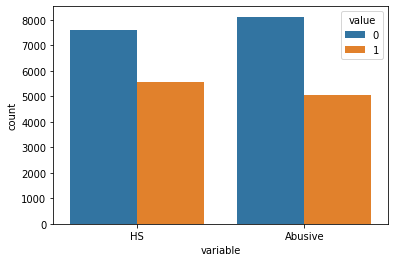

In [ ]:
sns.countplot(x="variable", hue="value", data=pd.melt(df.iloc[:,1:3]))

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#lowercase
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    #text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('((@[^\s]+)|(#[^\s]+))',' ',text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

replace_dict_map = dict(zip(replace_dict['original'], replace_dict['replacement']))
def normalize_alay(text):
    return ' '.join([replace_dict_map[word] if word in replace_dict_map else word for word in text.split(' ')])

def normalize_alay_new(text):
    return ' '.join([replace_dict_new[word] if word in replace_dict_new else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in stopwords.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def remove_stopword_new(text):
    text = ' '.join(['' if word in stopwords_new.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

def preprocess(text):
    text = lowercase(text) # 1
    text = remove_unnecessary_char(text) # 2
    text = remove_nonaplhanumeric(text) # 3
    text = normalize_alay(text) # 4
    text = normalize_alay_new(text)
    text = remove_stopword(text) # 5
    text = remove_stopword_new(text) 
    text = stemming(text) # 6
    return text

In [ ]:
X = df['Tweet'].apply(preprocess)
X

0        cowok usaha lacak perhati gue lantas remeh per...
1        rt guna guna telat tau edan sarap gue gaul cig...
2        41 kadang pikir percaya tuhan jatuh kali kali ...
3                              guna guna ku tau mata sipit
4            guna guna kaum cebong kafir dongok dungu haha
                               ...                        
13164              guna bicara ndasmu congor sekata anjing
13165                               guna kasur enak kunyuk
13166                        guna hati hati bisu bosan duh
13167    guna guna guna guna bom real mudah deteksi bom...
13168                         guna situ foto ya kutil onta
Name: Tweet, Length: 13169, dtype: object

In [ ]:
df.to_csv('data_clean.csv')